# Exam R
Nick Weerts
u1265916
396964


# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [16]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [17]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

I create a boxplot using ggplot's geom_boxplot function.

     group     
 Min.   :1.00  
 1st Qu.:1.00  
 Median :2.00  
 Mean   :1.58  
 3rd Qu.:2.00  
 Max.   :2.00  

 [1] 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 1
[39] 1 1 1 1 1 1 1 1 1 2 1 2


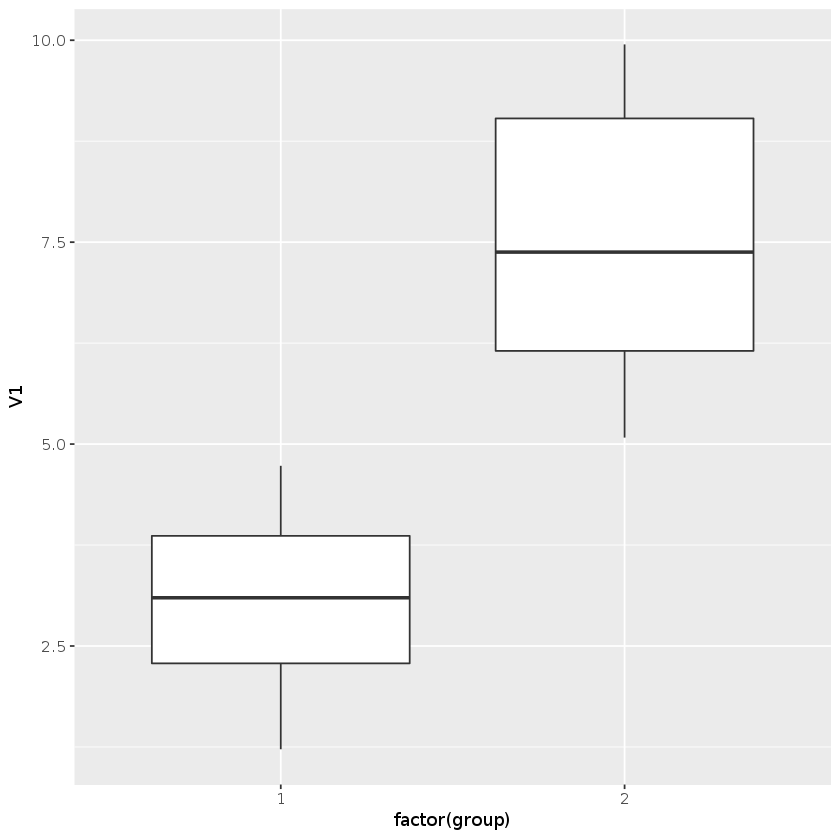

In [18]:
summary(df1['group'])
print(df1$group)
# From the above command it follows that group is a factor variable taking 1 or 2 as value.
# Therefore I use the factor command in the ggplot function.
ggplot(df1, aes(factor(group), V1)) +
    geom_boxplot()

    

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [19]:
reg1 <- lm(response ~ V1, data=df1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

# as we can see from below all conditional assumptions for linear regression are met.

In [20]:
gvlma(reg1)



Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c


Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



Since the y and x variable in the scatter correspond to the y and x in the reg1, I can add geom_smooth to the ggplot
command to add a linear regressed line. 

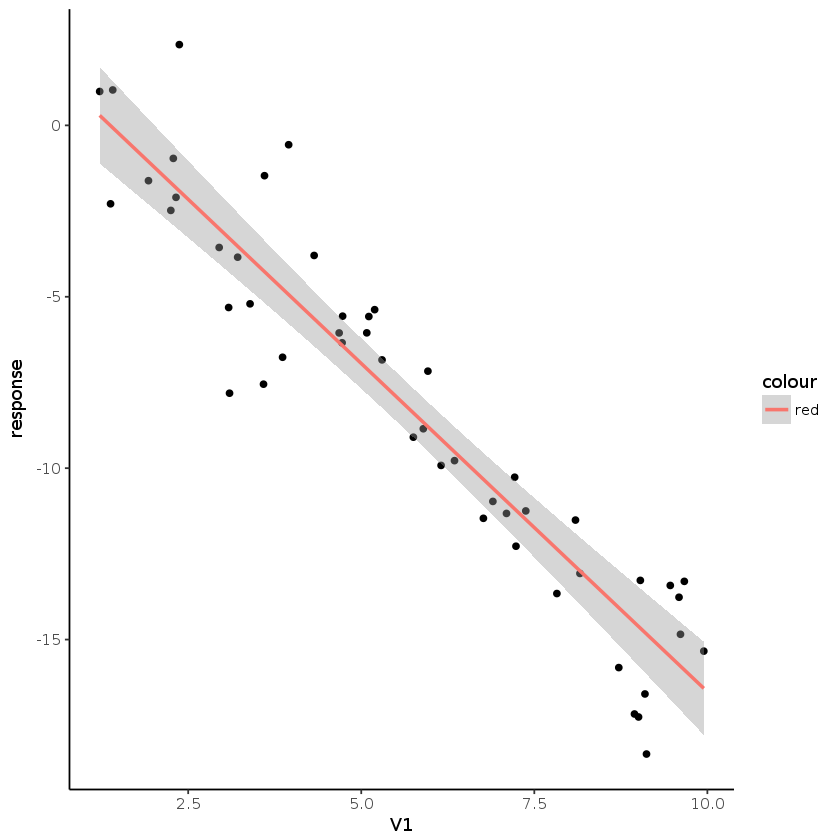

In [21]:

ggplot(df1, aes(y = response, x = V1,) ) +
    geom_point() +
    geom_smooth(method='lm', level=0.99, aes(col='red')) +
    theme_classic() 

# Assigment 2

# Packages

In [22]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [23]:
map_municipal <- read.csv2("nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

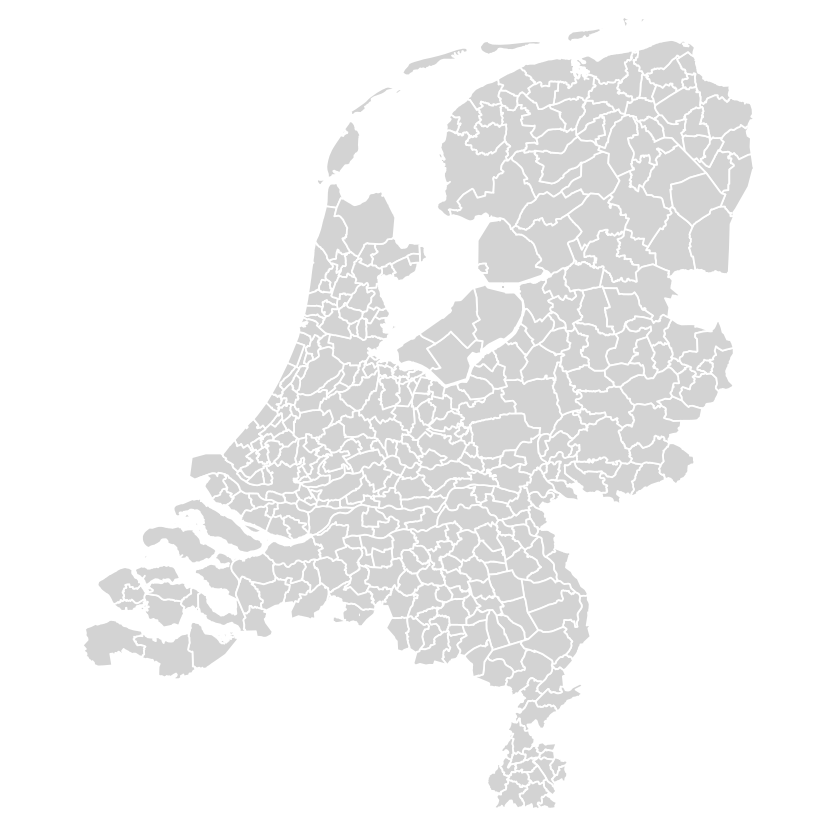

In [24]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [25]:
pc4_locations <- read.csv2("nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))
head(pc4_locations)
str(pc4_locations)

PC4,X,Y
1011,122244.1,487223.1
1012,121612.8,487555.4
1013,120324.5,489671.7
1014,119515.0,489421.7
1015,120740.5,488009.3
1016,120537.8,487075.4


'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [26]:
schools <- read.csv2("schools.csv")
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [27]:
schools1 <- schools %>% mutate(PC4 = as.numeric((POSTCODE)))
head(schools1)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM,PC4
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,,NA,,NA,,NA,,NA,,1
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,1337
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,1327
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,1330
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe,1325
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,1339


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [28]:
school_loc <- merge(schools1, pc4_locations, by="PC4" )
school_loc1 <- subset(school_loc, DENOMINATIE=="Rooms-Katholiek" |DENOMINATIE=="Protestants-Christelijk")
head(school_loc1)

,PC4,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,...,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM,X,Y
26,1037,Gelderland,42571,02FC,02FC00,PC SGM Ulenhof College v Ath Havo Mavo Vbo Lwoo,Bizetlaan,86,7002 LZ,DOETINCHEM,...,13,Oost-Gelderland,14,Achterhoek,8,Zuidelijke Achterhoek,13,Achterhoek,119418.4,493410.4
30,1044,Gelderland,42571,14UM,14UM00,Almende College voor Gymnasium Atheneum Havo Mavo Vbo Lwoo,Laan van Schuylenburch,8,7064 AL,SILVOLDE,...,13,Oost-Gelderland,14,Achterhoek,8,Zuidelijke Achterhoek,13,Achterhoek,115826.5,491047.8
31,1045,Gelderland,42571,14UM,14UM01,Almende College voor Gymnasium Atheneum Havo Mavo Vbo Lwoo,Pastoor Bluemersplein,2,7064 BK,SILVOLDE,...,13,Oost-Gelderland,14,Achterhoek,8,Zuidelijke Achterhoek,13,Achterhoek,114648.6,491963.1
32,1046,Gelderland,42571,14UM,14UM02,Almende College voor Gymnasium Atheneum Havo Mavo Vbo Lwoo,Heggenseveld,1,7071 WL,ULFT,...,13,Oost-Gelderland,14,Achterhoek,8,Zuidelijke Achterhoek,13,Achterhoek,114321.8,489490.4
33,1047,Gelderland,42571,00LJ,00LJ01,Christelijk College Schaersvoorde voor Atheneum Havo Mavo Vbo Lwoo,Europastraat,6,7091 XC,DINXPERLO,...,13,Oost-Gelderland,14,Achterhoek,8,Zuidelijke Achterhoek,13,Achterhoek,112096.3,490688.1
35,1052,Gelderland,42571,00LJ,00LJ00,Christelijk College Schaersvoorde voor Atheneum Havo Mavo Vbo Lwoo,Slingelaan,28,7122 AW,AALTEN,...,13,Oost-Gelderland,14,Achterhoek,8,Zuidelijke Achterhoek,13,Achterhoek,120084.3,487966.2


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


I do not know why it does not work, but I could not solve it unfortunately. 

In [29]:

tm_shape(map_municipal)

ERROR: Error in eval(expr, envir, enclos): could not find function "tm_shape"


End of notebook